# **AI IN BIOMEDICINE - FINAL ASSIGNMENT**

> **Authors of the notebook:** Pedro Gianjoppe, Alix de Langlais, Felipe Pascutti, Gianmarco Tardini

> **Goal:** In this homework, the objectif is to classify X-Ray images, which are divided into three categories: images of normal patients, images of tuberculosis patients, images of patients with pneumonia. The objective is also to perform XAI analysis to make the AI explainable. 

----


# **1. Introduction**

## 1.1 Set up the environment

In [ ]:
!pip install -U scikit-learn
!pip install scikit-optimize

# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import logging
import shutil
import matplotlib.cm as cm
import sklearn
from numpy import expand_dims
from IPython.display import Image, display
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow import keras
from IPython.display import Image, display
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from PIL import Image
import matplotlib.cm as c_map
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from os import listdir
import matplotlib.image as mpimg
from matplotlib import rcParams

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 90.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 11.0 MB/s eta 0:00:00
2.9.2


In [ ]:
# Random seed for reproducibility
seed = 42

random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

In [ ]:
# Suppress warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)
tf.get_logger().setLevel('INFO')
tf.autograph.set_verbosity(0)

tf.get_logger().setLevel(logging.ERROR)
tf.get_logger().setLevel('ERROR')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

## 1.2 Mount the *My Drive* folder

In [ ]:
#Link colab to the directories of a given google drive account
import os
from google.colab import drive
ROOT_PATH = os.path.join('/content/drive')
drive.mount(ROOT_PATH)

Mounted at /content/drive


In [ ]:
date_version = '140123_Final'
%cd /content/drive/Shareddrives/Applied AI Project/Pedro
%ls

/content/drive/Shareddrives/Applied AI Project/Pedro
 AIProject_CNN+MLClassifier_040123.ipynb
 AIProject_CNN+MLClassifier_050123.ipynb
 AIProject_CNN+MLClassifier_050123_v1.ipynb
 AIProject_CNN+MLClassifier_050123_v2.ipynb
 AIProject_CNN+MLClassifier_060123_v0.ipynb
 AIProject_CNN+MLClassifier_090123.ipynb
 AIProject_CNN+MLClassifier_100123.ipynb
 AIProject_CNN+MLClassifier_100123_v0.ipynb
 AIProject_CNN+MLClassifier_110123.ipynb
 AIProject_CNN+MLClassifier_120123.ipynb
 AIProject_CNN+MLClassifier_140123.ipynb
 AIProject_TransferLearning_020123_v0.ipynb
 AIProject_TransferLearning_020123_v1.ipynb
 AIProject_TransferLearning_030123_v0.ipynb
 AIProject_TransferLearning_030123_v1.ipynb
 AIProject_TransferLearning_040123_v1.ipynb
 AIProject_TransferLearning_testEfficientNet_all_data_030123.ipynb
 code_test_071222.ipynb
 Dataset/
 Dataset_30/
 Dataset_300/
 final_dataset_dir/
 LogBook.gdoc
 model_DenseNet+AdaBoost_120123.pkl
 model_DenseNet+RF_110123.pkl
 model.png
 models_experiments/
 mod

## 1.3 Extract the files from the compressed archive

In [ ]:
'''import zipfile

with zipfile.ZipFile('/content/drive/Shareddrives/Applied AI Project/train_set_v2.zip','r') as zip_ref:
  zip_ref.extractall('/content/drive/Shareddrives/Applied AI Project/Alix/train - no noise')'''

"import zipfile\n\nwith zipfile.ZipFile('/content/drive/Shareddrives/Applied AI Project/train_set_v2.zip','r') as zip_ref:\n  zip_ref.extractall('/content/drive/Shareddrives/Applied AI Project/Alix/train - no noise')"

# **2. Data Loading**

Already done by the running the file AIProject_CNN.ipynb

# **3. Data Augmentation**

Already done by the running the file AIProject_CNN.ipynb

# **4. Data Loader - Image Data Generator**

In [ ]:
# Dataset folders
%cd /content/drive/Shareddrives/Applied AI Project/Alix 
dataset_dir = 'Dataset_130123'
training_dir = os.path.join(dataset_dir, 'training')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')
augmentation_dir = os.path.join(dataset_dir, 'augmentation')

train_size = 438 #5760  ###################### NEED TO BE CHANGED ACCORDING TO THE dataset_dir choosen
validation_size = 30 #360 
test_size = 26 #360 

/content/drive/Shareddrives/Applied AI Project/Alix


In [ ]:
#%cd /content/drive/Shareddrives/Applied AI Project/Alix/Dataset_030123/augmentation/Pneumonia
#print(len(os.listdir()))
#%cd /content/drive/Shareddrives/Applied AI Project/Alix/Dataset_030123/augmentation/Tuberculosis
#print(len(os.listdir()))
#%cd /content/drive/Shareddrives/Applied AI Project/Alix/Dataset_030123/augmentation/Normal
#print(len(os.listdir()))

In [ ]:
# Images are divided into folders, one for each class. 
# If the images are organized in such a way, we can exploit the 
# ImageDataGenerator to read them from disk.

labels = ['Normal',   
          'Pneumonia',   
          'Tuberculosis']
          
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for training, validation, and test sets
train_data_gen = ImageDataGenerator()
valid_data_gen = ImageDataGenerator()
test_data_gen = ImageDataGenerator()

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
train_gen = train_data_gen.flow_from_directory(directory=augmentation_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=labels, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=True,
                                               seed=seed)

valid_gen = train_data_gen.flow_from_directory(directory=validation_dir,
                                               target_size=(256,256),
                                               color_mode='rgb',
                                               classes=labels, # can be set to labels
                                               class_mode='categorical',
                                               batch_size=8,
                                               shuffle=False,
                                               seed=seed)

test_gen = train_data_gen.flow_from_directory(directory=test_dir,
                                              target_size=(256,256),
                                              color_mode='rgb',
                                              classes=labels, # can be set to labels
                                              class_mode='categorical',
                                              batch_size=8,
                                              shuffle=False,
                                              seed=seed)

Found 7086 images belonging to 3 classes.
Found 360 images belonging to 3 classes.
Found 360 images belonging to 3 classes.


In [ ]:
print("Assigned labels")
print(train_gen.class_indices)
print()
print("Target classes")
print(train_gen.classes)

Assigned labels
{'Normal': 0, 'Pneumonia': 1, 'Tuberculosis': 2}

Target classes
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [ ]:
def get_next_batch(generator):
  batch = next(generator)

  image = batch[0]
  target = batch[1]

  print("(Input) image shape:", image.shape)
  print("Target shape:",target.shape)

  # Visualize only the first sample
  image = image[0]
  target = target[0]
  target_idx = np.argmax(target)
  print()
  print("Categorical label:", target)
  print("Label:", target_idx)
  print("Class name:", labels[target_idx])
  fig = plt.figure(figsize=(6, 4))
  plt.imshow(np.uint8(image))

  return batch

(Input) image shape: (8, 256, 256, 3)
Target shape: (8, 3)

Categorical label: [0. 0. 1.]
Label: 2
Class name: Tuberculosis


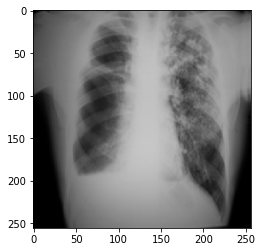

In [ ]:
# Get a sample from dataset and show info
_ = get_next_batch(train_gen)

# **5. CNN + ML classifier**

In [ ]:
# Model metadata
input_shape = (256, 256, 3)

## **SVM Classifier**

In this case, we will train a linear SVM classifier on the features extracted by the convolutional base. To train this classifier, a traditional machine learning approach is preferable. Accordingly, we will use k-fold cross-validation to estimate the error of the classifier. Since k-fold cross-validation will be used, we can concatenate the train and the validation sets to enlarge our training data (we keep the test set untouched, as we did in the previous cases).

### CNN Feature Extractor

For SVM: it is better to extract the features from the output of the VGG19  with shape 8,8,512

80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

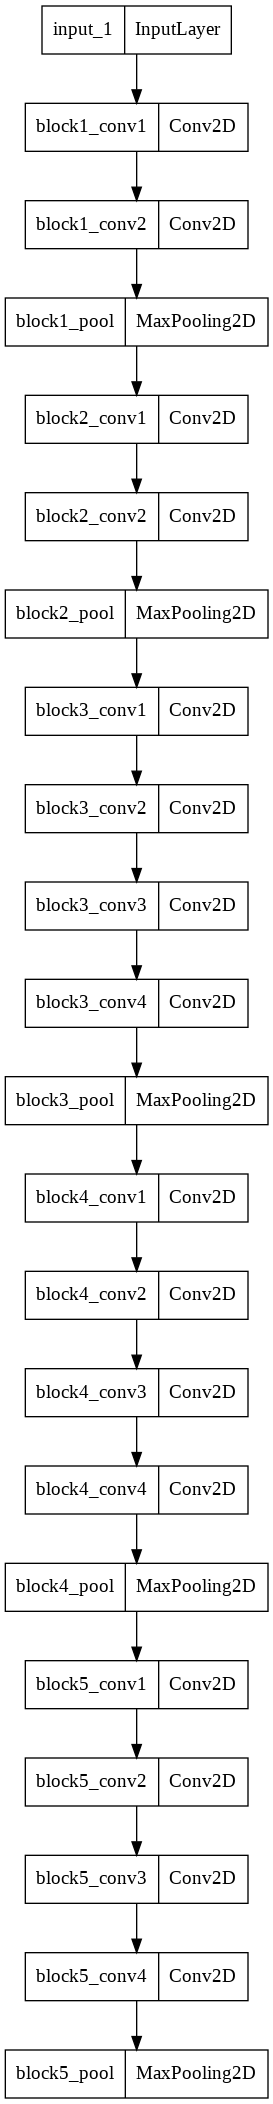

In [ ]:
# Download and plot the VGG19 model
conv_base = tfk.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)
conv_base.summary()
tfk.utils.plot_model(conv_base)

In [ ]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(preprocessing_function=tfk.applications.vgg19.preprocess_input)
batch_size = 8

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8,8,512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            #classes=labels, # can be set to labels
                                            class_mode='categorical',
                                            batch_size=8,
                                            shuffle=True,
                                            seed=seed)
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size, :] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(augmentation_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 438 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step
Found 30 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step
Found 26 images belonging to 3 classes.
1/1 [==============================] - 1s 895ms/step


In [ ]:
%cd /content/drive/Shareddrives/Applied AI Project/Pedro


/content/drive/Shareddrives/Applied AI Project/Pedro


In [ ]:
# Debug
print(train_features)
print(train_labels)

[[[[0.00000000e+00 6.80730771e-03 3.75166815e-03 ... 3.24689806e-01
    7.96374202e-01 2.45486379e+00]
   [0.00000000e+00 0.00000000e+00 7.73013476e-03 ... 5.65211594e-01
    9.89633560e-01 2.79196811e+00]
   [1.58623909e-04 5.25092334e-03 0.00000000e+00 ... 3.54395390e+00
    4.28822458e-01 0.00000000e+00]
   ...
   [2.83420493e-04 7.67552759e-03 0.00000000e+00 ... 5.57299328e+00
    1.41692734e+00 0.00000000e+00]
   [6.32442592e-04 0.00000000e+00 0.00000000e+00 ... 3.49772072e+00
    1.21647716e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.53658211e+00
    7.83565760e-01 5.65490723e-02]]

  [[2.72654346e-04 0.00000000e+00 1.69935878e-02 ... 2.04752994e+00
    5.33173442e-01 1.62285328e+00]
   [2.68547563e-04 1.90080632e-03 7.31883058e-03 ... 1.75171506e+00
    3.08608890e-01 1.90061021e+00]
   [0.00000000e+00 3.41589097e-03 0.00000000e+00 ... 5.04930258e+00
    6.38133466e-01 0.00000000e+00]
   ...
   [6.89801644e-04 0.00000000e+00 0.00000000e+00 ... 6.44

### Prepare data

In [ ]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))
train_val_size = train_size + validation_size

In [ ]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, y_train_matrix = svm_features.reshape(train_val_size,8*8*512), svm_labels

y_train = np.argmax(y_train_matrix, axis = 1)


### Hyperparameter search

In [ ]:
# Bayesian hyperparameter optmization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


# Define the values for each hyperparameter
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']

In [ ]:
"""# 2. Crossvalidate model to obtain the best fit
from sklearn import svm
from skopt import BayesSearchCV
from sklearn.metrics import classification_report

# create classifier grid: define classifier, hyperparam values and scoring metric
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
clf = BayesSearchCV(estimator=svm.SVC(), search_spaces=params, cv=cv, scoring='f1_macro', n_iter=20) #Decrease n_iter to make it faster
clf.fit(X_train, y_train)"""

"# 2. Crossvalidate model to obtain the best fit\nfrom sklearn import svm\nfrom skopt import BayesSearchCV\nfrom sklearn.metrics import classification_report\n\n# create classifier grid: define classifier, hyperparam values and scoring metric\ncv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)\nclf = BayesSearchCV(estimator=svm.SVC(), search_spaces=params, cv=cv, scoring='f1_macro', n_iter=20) #Decrease n_iter to make it faster\nclf.fit(X_train, y_train)"

In [ ]:
"""# print results for each combination of parameters
for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

# display best combination of parameters
print('Best combination of hyperparameters: ' + str(clf.best_params_))"""

"# print results for each combination of parameters\nfor param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):\n    print(param, score)\n\n# display best combination of parameters\nprint('Best combination of hyperparameters: ' + str(clf.best_params_))"

OrderedDict([('C', 0.00708511767643031), ('degree', 4), ('gamma', 0.0022201424435350117), ('kernel', 'rbf')]) 0.174550657247608
OrderedDict([('C', 3.463327854774776e-06), ('degree', 3), ('gamma', 0.7950508655115479), ('kernel', 'rbf')]) 0.174550657247608
OrderedDict([('C', 0.8079859540928936), ('degree', 4), ('gamma', 1.4849392396553184e-05), ('kernel', 'poly')]) 0.6840396798682646
OrderedDict([('C', 3.522411945188943e-05), ('degree', 1), ('gamma', 0.00013234326537722848), ('kernel', 'rbf')]) 0.174550657247608
OrderedDict([('C', 0.2911358577270257), ('degree', 3), ('gamma', 0.012906116414760823), ('kernel', 'poly')]) 0.7914512362856804
OrderedDict([('C', 0.16693582686049602), ('degree', 1), ('gamma', 0.00036432183323837773), ('kernel', 'poly')]) 0.8881018114954062
OrderedDict([('C', 0.040770295314912414), ('degree', 5), ('gamma', 3.1615587887046486e-05), ('kernel', 'poly')]) 0.5591219674311163
OrderedDict([('C', 0.0003530161979351176), ('degree', 2), ('gamma', 0.0001814697925943685), ('kernel', 'poly')]) 0.8577959885160426
OrderedDict([('C', 0.12108917327996714), ('degree', 3), ('gamma', 0.0010213255236665025), ('kernel', 'rbf')]) 0.174550657247608
OrderedDict([('C', 0.13255657267294213), ('degree', 1), ('gamma', 2.7074464434441388), ('kernel', 'sigmoid')]) 0.174550657247608
OrderedDict([('C', 0.21956182412391845), ('degree', 1), ('gamma', 0.0011029183861055662), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 100.0), ('degree', 5), ('gamma', 100.0), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 4.514012205183504), ('degree', 3), ('gamma', 0.7553512326902821), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 1e-06), ('degree', 4), ('gamma', 1e-06), ('kernel', 'linear')]) 0.8420822841333206
OrderedDict([('C', 100.0), ('degree', 1), ('gamma', 100.0), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 100.0), ('degree', 5), ('gamma', 100.0), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 100.0), ('degree', 5), ('gamma', 100.0), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 100.0), ('degree', 5), ('gamma', 100.0), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 100.0), ('degree', 2), ('gamma', 100.0), ('kernel', 'linear')]) 0.8881018114954062
OrderedDict([('C', 100.0), ('degree', 1), ('gamma', 100.0), ('kernel', 'poly')]) 0.8881018114954062
Best combination of hyperparameters: OrderedDict([('C', 0.16693582686049602), ('degree', 1), ('gamma', 0.00036432183323837773), ('kernel', 'poly')])

### Train and evaluate best model

In [ ]:
from sklearn import svm

#best_params_ = OrderedDict([('C', 0.16693582686049602), ('degree', 1), ('gamma', 0.00036432183323837773), ('kernel', 'poly')])

best_params_ = dict()
best_params_['C'] = 0.16693582686049602
best_params_['gamma'] = 0.00036432183323837773
best_params_['degree'] = 1
best_params_['kernel'] = 'poly'

#clf_best = svm.SVC(**clf.best_params_)

clf_best = svm.SVC(**best_params_)
clf_best.fit(X_train, y_train)

SVC(C=0.16693582686049602, degree=1, gamma=0.00036432183323837773,
    kernel='poly')

In [ ]:
# Save model
import joblib

#save your model or results
joblib.dump(clf_best, 'model_VGG19+SVM_120123.pkl')

['model_DenseNet+SVM_110123.pkl']

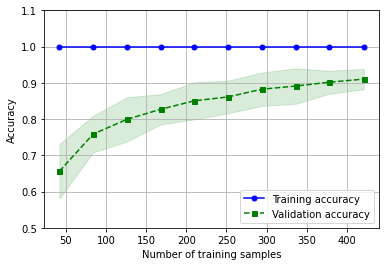

In [ ]:
# Plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf_best,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()

In [ ]:
# Evaluate model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Accuracy in training dataset
acc_train = np.mean(cross_val_score(clf_best, X_train, y_train, cv=10))
acc_train_std = np.std(cross_val_score(clf_best, X_train, y_train, cv=10))

# Predict the values from the test dataset
X_test, y_test_matrix = test_features.reshape(test_size,8*8*512), test_labels
y_test = np.argmax(y_test_matrix, axis = 1)

y_pred = clf_best.predict(X_test)


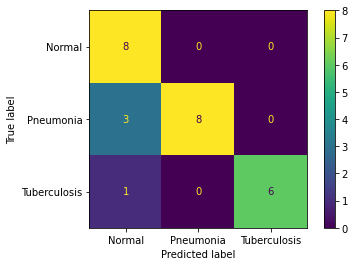

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculosis'])
disp.plot()
plt.show()

In [ ]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['Normal', 'Pneumonia', 'Tuberculosis']))


              precision    recall  f1-score   support

      Normal       0.67      1.00      0.80         8
   Pneumonia       1.00      0.73      0.84        11
Tuberculosis       1.00      0.86      0.92         7

    accuracy                           0.85        26
   macro avg       0.89      0.86      0.86        26
weighted avg       0.90      0.85      0.85        26



In [ ]:
# Compute the classification metrics on the test set
accuracy = accuracy_score(y_true = y_test,y_pred = y_pred)
precision = precision_score(y_true = y_test,y_pred = y_pred, average='macro')
recall = recall_score(y_true = y_test,y_pred = y_pred, average='macro')
f1 = f1_score(y_true = y_test,y_pred = y_pred, average='macro')
f1_vector = f1_score(y_true = y_test,y_pred = y_pred, average=None)


# Dictionnary with metrics

print('acc_train: ', acc_train)
print('acc_train_std: ', acc_train_std)
print('Accuracy', accuracy.round(4))
print('Precision', precision.round(4))
print('Recall', recall.round(4))
print('Global F1', f1.round(4))
print('F1 Normal', f1_vector[0])
print('F1 Pneumonia', f1_vector[1])
print('F1 Tuberculosis', f1_vector[2])

data =  {
'acc_train': [],
'acc_train_std': [],
'Accuracy' : [],
'Precision' : [],
'Recall' : [],
'Global F1' : [],
'F1 Normal' : [],
'F1 Pneumonia' : [],
'F1 Tuberculosis' : [],
}

df_results = pd.DataFrame(data)

new_row =  {
'acc_train': acc_train,
'acc_train_std': acc_train_std,
'Accuracy' : accuracy.round(4),
'Precision' : precision.round(4),
'Recall' : recall.round(4),
'Global F1' : f1.round(4),
'F1 Normal' : f1_vector[0],
'F1 Pneumonia' : f1_vector[1],
'F1 Tuberculosis' : f1_vector[2],
}

df_results = df_results.append(new_row, ignore_index=True)

df_results.to_excel('results_VGG19_SVM_1201.xlsx')
!cp results_VGG19_SVM_1201.xlsx "/content/drive/Shareddrives/Applied AI Project/Pedro/Results" #wherever u want

df_results

acc_train:  0.9103145235892691
acc_train_std:  0.028080427323795003
Accuracy 0.8462
Precision 0.8889
Recall 0.8615
Global F1 0.8551
F1 Normal 0.8
F1 Pneumonia 0.8421052631578948
F1 Tuberculosis 0.923076923076923


,acc_train,acc_train_std,Accuracy,Precision,Recall,Global F1,F1 Normal,F1 Pneumonia,F1 Tuberculosis
0,0.910315,0.02808,0.8462,0.8889,0.8615,0.8551,0.8,0.842105,0.923077


## **Random Forest Classifier**

For RF, it is better to extract the features from the 512 neurons dense layer with shape (1,512)

### CNN Feature Extractor

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 128, 128, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                       

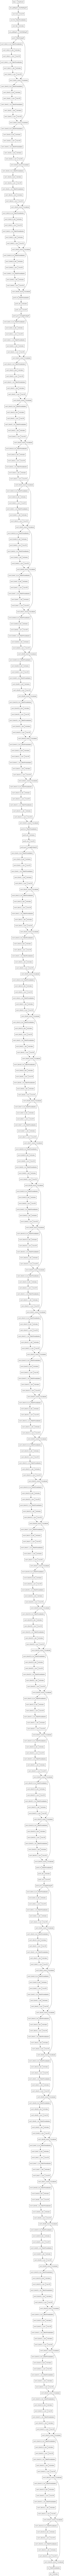

In [ ]:
# Download and plot the VGG19 model
vgg_19 = tfk.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)
vgg_19.summary()
tfk.utils.plot_model(vgg_19)

In [ ]:
def build_model(input_shape):

    ##INPUT

    input_layer = tfkl.Input(shape=input_shape, name='input_layer')
    
    ##VGG19 as feature extractor
    x = vgg_19(input_layer)

    ## Global pooling
    #Instead of using a fattening layer after feature extractor, this research has applied global average pooling to reduce the number of learning parameter
    x = tfkl.GlobalAveragePooling2D()(x)

    #The feature vector is collected from the dense layer having 512 neurons in the classifer
    output_layer = tfkl.Dense(
        512, 
        activation='relu',
        kernel_initializer = tfk.initializers.HeUniform(seed))(x)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='model')

    ##Fine-tuning
    #Fine-tuning VGG-19 includes retraining only the last convolution block of the VGG-19, while freezing the frst four blocks of the model
    for i, layer in enumerate(model.get_layer('vgg19').layers[:16]):
      layer.trainable=False
    for i, layer in enumerate(model.get_layer('vgg19').layers):
      print(i, layer.name, layer.trainable)

    # Compile the model
    model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(1e-4), metrics='accuracy')

    # Return the model
    return model

In [ ]:
conv_base = build_model(input_shape)
conv_base.summary()


0 input_1 False
1 zero_padding2d False
2 conv1/conv False
3 conv1/bn False
4 conv1/relu False
5 zero_padding2d_1 False
6 pool1 False
7 conv2_block1_0_bn False
8 conv2_block1_0_relu False
9 conv2_block1_1_conv False
10 conv2_block1_1_bn False
11 conv2_block1_1_relu False
12 conv2_block1_2_conv False
13 conv2_block1_concat False
14 conv2_block2_0_bn False
15 conv2_block2_0_relu False
16 conv2_block2_1_conv True
17 conv2_block2_1_bn True
18 conv2_block2_1_relu True
19 conv2_block2_2_conv True
20 conv2_block2_concat True
21 conv2_block3_0_bn True
22 conv2_block3_0_relu True
23 conv2_block3_1_conv True
24 conv2_block3_1_bn True
25 conv2_block3_1_relu True
26 conv2_block3_2_conv True
27 conv2_block3_concat True
28 conv2_block4_0_bn True
29 conv2_block4_0_relu True
30 conv2_block4_1_conv True
31 conv2_block4_1_bn True
32 conv2_block4_1_relu True
33 conv2_block4_2_conv True
34 conv2_block4_concat True
35 conv2_block5_0_bn True
36 conv2_block5_0_relu True
37 conv2_block5_1_conv True
38 conv2_bl

In [ ]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(preprocessing_function=tfk.applications.vgg19.preprocess_input)
batch_size = 8

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            #classes=labels, # can be set to labels
                                            class_mode='categorical',
                                            batch_size=8,
                                            shuffle=True,
                                            seed=seed)
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size, :] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(augmentation_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 438 images belonging to 3 classes.
1/1 [==============================] - 2s 2s/step
Found 30 images belonging to 3 classes.
1/1 [==============================] - 0s 36ms/step
Found 26 images belonging to 3 classes.
1/1 [==============================] - 1s 979ms/step


In [ ]:
# Debug
print(train_features)
print(train_labels)

[[0.         0.         0.         ... 0.3972615  0.         0.        ]
 [0.         0.         0.         ... 1.35617745 0.         0.        ]
 [0.30421376 0.         0.         ... 0.06640576 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.29395068 0.        ]
 [0.08381674 0.         0.         ... 0.20984924 0.         0.        ]
 [0.         0.         0.         ... 0.83290625 0.         0.        ]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


### Prepare data

In [ ]:
# Concatenate training and validation sets
rf_features = np.concatenate((train_features, validation_features))
rf_labels = np.concatenate((train_labels, validation_labels))
train_val_size = train_size + validation_size

In [ ]:

X_train, y_train_matrix = rf_features.reshape(train_val_size,512), rf_labels

y_train = np.argmax(y_train_matrix, axis = 1)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(468, 512)
(468,)


### Hyperparameter search

In [ ]:
# Bayesian hyperparameter optmization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV


# Define the values for each hyperparameter
params = {"n_estimators": (10, 1000),
              "max_depth": (1, 150),
              "min_samples_split": (2, 10), 
              "max_samples":(0.5,1), 
              "max_features":(0.5,1)}

In [ ]:
"""# 2. Crossvalidate model to obtain the best fit
from skopt import BayesSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# create classifier grid: define classifier, hyperparam values and scoring metric
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params, cv=cv, scoring='f1_macro', n_iter=20) #Decrease n_iter to make it faster
clf.fit(X_train, y_train)"""

"# 2. Crossvalidate model to obtain the best fit\nfrom skopt import BayesSearchCV\nfrom sklearn.metrics import classification_report\nfrom sklearn.ensemble import RandomForestClassifier\n\n# create classifier grid: define classifier, hyperparam values and scoring metric\ncv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)\nclf = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=params, cv=cv, scoring='f1_macro', n_iter=20) #Decrease n_iter to make it faster\nclf.fit(X_train, y_train)"

In [ ]:
"""# print results for each combination of parameters
for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

# display best combination of parameters
print('Best combination of hyperparameters: ' + str(clf.best_params_))"""

"# print results for each combination of parameters\nfor param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):\n    print(param, score)\n\n# display best combination of parameters\nprint('Best combination of hyperparameters: ' + str(clf.best_params_))"

OrderedDict([('max_depth', 73), ('max_features', 0.8210417887003923), ('max_samples', 0.7091488024700754), ('min_samples_split', 8), ('n_estimators', 791)]) 0.7794928255024385
OrderedDict([('max_depth', 105), ('max_features', 0.6904875092388432), ('max_samples', 0.9113194426289155), ('min_samples_split', 8), ('n_estimators', 433)]) 0.7741583738046216
OrderedDict([('max_depth', 90), ('max_features', 0.9458763291004777), ('max_samples', 0.9620052775567689), ('min_samples_split', 5), ('n_estimators', 135)]) 0.7704111294850833
OrderedDict([('max_depth', 99), ('max_features', 0.9971320296687873), ('max_samples', 0.8847666004984434), ('min_samples_split', 7), ('n_estimators', 17)]) 0.7287801208937152
OrderedDict([('max_depth', 25), ('max_features', 0.6915340940215532), ('max_samples', 0.8095761931825667), ('min_samples_split', 3), ('n_estimators', 793)]) 0.7813352515751859
OrderedDict([('max_depth', 26), ('max_features', 0.5191915487119741), ('max_samples', 0.6562784573575724), ('min_samples_split', 8), ('n_estimators', 70)]) 0.7652360879703974
OrderedDict([('max_depth', 13), ('max_features', 0.8906263567181631), ('max_samples', 0.9600461243592698), ('min_samples_split', 10), ('n_estimators', 232)]) 0.7640310183188185
OrderedDict([('max_depth', 27), ('max_features', 0.6683948597731462), ('max_samples', 0.6012597952584933), ('min_samples_split', 5), ('n_estimators', 835)]) 0.7830953576020419
OrderedDict([('max_depth', 30), ('max_features', 0.5605200045483898), ('max_samples', 0.8719541256415935), ('min_samples_split', 6), ('n_estimators', 902)]) 0.7864312636123041
OrderedDict([('max_depth', 10), ('max_features', 0.5423156153254907), ('max_samples', 0.8144797365081877), ('min_samples_split', 3), ('n_estimators', 761)]) 0.7879558280810802
OrderedDict([('max_depth', 21), ('max_features', 0.5), ('max_samples', 0.9560910902354546), ('min_samples_split', 3), ('n_estimators', 634)]) 0.794954220808958
OrderedDict([('max_depth', 61), ('max_features', 1.0), ('max_samples', 0.9899479800786939), ('min_samples_split', 10), ('n_estimators', 633)]) 0.773497397359836
OrderedDict([('max_depth', 95), ('max_features', 0.5), ('max_samples', 0.5448483612889798), ('min_samples_split', 2), ('n_estimators', 10)]) 0.6912017725353766
OrderedDict([('max_depth', 150), ('max_features', 0.6542914256665369), ('max_samples', 0.5), ('min_samples_split', 2), ('n_estimators', 686)]) 0.7767066347355558
OrderedDict([('max_depth', 1), ('max_features', 0.5645571287766319), ('max_samples', 0.9812439305191754), ('min_samples_split', 2), ('n_estimators', 514)]) 0.46130029111242254
OrderedDict([('max_depth', 1), ('max_features', 0.9468937490120455), ('max_samples', 0.9985198132997761), ('min_samples_split', 4), ('n_estimators', 308)]) 0.43494320511135687
OrderedDict([('max_depth', 83), ('max_features', 1.0), ('max_samples', 0.8742242171710859), ('min_samples_split', 10), ('n_estimators', 581)]) 0.767297742120888
OrderedDict([('max_depth', 14), ('max_features', 0.5), ('max_samples', 0.9184587059909193), ('min_samples_split', 5), ('n_estimators', 1000)]) 0.7933517460340551
OrderedDict([('max_depth', 12), ('max_features', 0.5), ('max_samples', 0.5584002030226886), ('min_samples_split', 2), ('n_estimators', 628)]) 0.78327331079085
OrderedDict([('max_depth', 19), ('max_features', 0.5), ('max_samples', 0.9162905824649676), ('min_samples_split', 6), ('n_estimators', 1000)]) 0.7952816572594503
Best combination of hyperparameters: OrderedDict([('max_depth', 19), ('max_features', 0.5), ('max_samples', 0.9162905824649676), ('min_samples_split', 6), ('n_estimators', 1000)])

### Train and evaluate best model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#best_params_ = OrderedDict([('max_depth', 19), ('max_features', 0.5), ('max_samples', 0.9162905824649676), ('min_samples_split', 6), ('n_estimators', 1000)])

#clf_best = RandomForestClassifier(**clf.best_params_)

best_params_ = {"n_estimators": 1000,
              "max_depth": 19,
              "min_samples_split": 6, 
              "max_samples":0.9162905824649676, 
              "max_features":0.5}

clf_best = RandomForestClassifier(**best_params_)

clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, max_features=0.5,
                       max_samples=0.9162905824649676, min_samples_split=6,
                       n_estimators=1000)

In [ ]:
# Save model
import joblib

#save your model or results
joblib.dump(clf_best, 'model_VGG19+RF_120123.pkl')

['model_DenseNet+RF_110123.pkl']

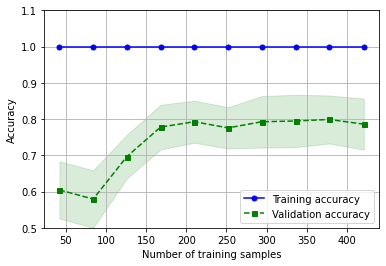

In [ ]:
# Plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf_best,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()

In [ ]:
# Evaluate model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Accuracy in training dataset
acc_train = np.mean(cross_val_score(clf_best, X_train, y_train, cv=10))
acc_train_std = np.std(cross_val_score(clf_best, X_train, y_train, cv=10))

# Predict the values from the test dataset
X_test, y_test_matrix = test_features.reshape(test_size,512), test_labels
y_test = np.argmax(y_test_matrix, axis = 1)

y_pred = clf_best.predict(X_test)


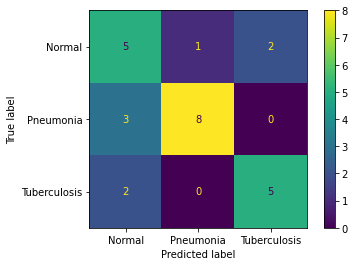

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculosis'])
disp.plot()
plt.show()

In [ ]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['Normal', 'Pneumonia', 'Tuberculosis']))


              precision    recall  f1-score   support

      Normal       0.50      0.62      0.56         8
   Pneumonia       0.89      0.73      0.80        11
Tuberculosis       0.71      0.71      0.71         7

    accuracy                           0.69        26
   macro avg       0.70      0.69      0.69        26
weighted avg       0.72      0.69      0.70        26



In [ ]:
# Compute the classification metrics on the test set
accuracy = accuracy_score(y_true = y_test,y_pred = y_pred)
precision = precision_score(y_true = y_test,y_pred = y_pred, average='macro')
recall = recall_score(y_true = y_test,y_pred = y_pred, average='macro')
f1 = f1_score(y_true = y_test,y_pred = y_pred, average='macro')
f1_vector = f1_score(y_true = y_test,y_pred = y_pred, average=None)


# Dictionnary with metrics

print('acc_train: ', acc_train)
print('acc_train_std: ', acc_train_std)
print('Accuracy', accuracy.round(4))
print('Precision', precision.round(4))
print('Recall', recall.round(4))
print('Global F1', f1.round(4))
print('F1 Normal', f1_vector[0])
print('F1 Pneumonia', f1_vector[1])
print('F1 Tuberculosis', f1_vector[2])

data =  {
'acc_train': [],
'acc_train_std': [],
'Accuracy' : [],
'Precision' : [],
'Recall' : [],
'Global F1' : [],
'F1 Normal' : [],
'F1 Pneumonia' : [],
'F1 Tuberculosis' : [],
}

df_results = pd.DataFrame(data)

new_row =  {
'acc_train': acc_train,
'acc_train_std': acc_train_std,
'Accuracy' : accuracy.round(4),
'Precision' : precision.round(4),
'Recall' : recall.round(4),
'Global F1' : f1.round(4),
'F1 Normal' : f1_vector[0],
'F1 Pneumonia' : f1_vector[1],
'F1 Tuberculosis' : f1_vector[2],
}

%cd /content/drive/Shareddrives/Applied AI Project/Pedro

df_results.to_excel('results_VGG19_RF_1201.xlsx')
!cp results_VGG19_RF_1201.xlsx "/content/drive/Shareddrives/Applied AI Project/Pedro/Results" #wherever u want

df_results

acc_train:  0.7946345975948197
acc_train_std:  0.06548164883447098
Accuracy 0.6923
Precision 0.7011
Recall 0.6889
Global F1 0.6899
F1 Normal 0.5555555555555556
F1 Pneumonia 0.7999999999999999
F1 Tuberculosis 0.7142857142857143
/content/drive/Shareddrives/Applied AI Project/Pedro


,acc_train,acc_train_std,Accuracy,Precision,Recall,Global F1,F1 Normal,F1 Pneumonia,F1 Tuberculosis


## **AdaBoost**

### CNN Feature Extractor

In [ ]:
# Download and plot the DenseNet model
conv_base = tfk.applications.densenet.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)
conv_base.summary()
tfk.utils.plot_model(conv_base)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator


train_data_gen = ImageDataGenerator(preprocessing_function=tfk.applications.densenet.preprocess_input)
batch_size = 8

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8,8,1024))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            #classes=labels, # can be set to labels
                                            class_mode='categorical',
                                            batch_size=8,
                                            shuffle=True,
                                            seed=seed)
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size, :] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(augmentation_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 438 images belonging to 3 classes.
1/1 [==============================] - 1s 1s/step
Found 30 images belonging to 3 classes.
1/1 [==============================] - 0s 34ms/step
Found 26 images belonging to 3 classes.
1/1 [==============================] - 1s 924ms/step


In [ ]:
%cd /content/drive/Shareddrives/Applied AI Project/Pedro


/content/drive/Shareddrives/Applied AI Project/Pedro


In [ ]:
# Debug
print(train_features)
print(train_labels)

[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 5.02682328e-01
    3.24751139e+00 7.10889280e-01]
   [0.00000000e+00 0.00000000e+00 9.48343519e-03 ... 2.10466766e+00
    2.39368105e+00 1.68873417e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.82994413e+00
    1.87487960e+00 2.70452666e+00]
   ...
   [0.00000000e+00 8.72271042e-03 0.00000000e+00 ... 1.75812352e+00
    1.34563768e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.11208749e+00
    1.74955964e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.18567705e+00
    1.28132868e+00 0.00000000e+00]]

  [[0.00000000e+00 0.00000000e+00 4.54775197e-03 ... 1.77898335e+00
    3.04892111e+00 4.18940276e-01]
   [0.00000000e+00 0.00000000e+00 3.09249363e-03 ... 2.73368359e+00
    1.57153738e+00 1.71862280e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.12416911e+00
    1.59750879e+00 3.59230399e+00]
   ...
   [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.90

### Prepare data

In [ ]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))
train_val_size = train_size + validation_size

In [ ]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X_train, y_train_matrix = svm_features.reshape(train_val_size,8*8*1024), svm_labels

y_train = np.argmax(y_train_matrix, axis = 1)


### Hyperparameter search

In [ ]:
# Bayesian hyperparameter optmization
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


# Define the values for each hyperparameter
params = dict()
params['n_estimators'] = (10, 100, 'log-uniform')
params['learning_rate'] = (1.0, 2.0, 'log-uniform')


In [ ]:
"""# 2. Crossvalidate model to obtain the best fit
from sklearn.ensemble import AdaBoostClassifier
from skopt import BayesSearchCV
from sklearn.metrics import classification_report

# create classifier grid: define classifier, hyperparam values and scoring metric
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
clf = BayesSearchCV(estimator=AdaBoostClassifier(), search_spaces=params, cv=cv, scoring='f1_macro', n_iter=20) #Decrease n_iter to make it faster
clf.fit(X_train, y_train)"""

BayesSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
              estimator=AdaBoostClassifier(), n_iter=20, scoring='f1_macro',
              search_spaces={'learning_rate': (1, 2, 'log-uniform'),
                             'n_estimators': (10, 100, 'log-uniform')})

In [ ]:
"""# print results for each combination of parameters
for param, score in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    print(param, score)

# display best combination of parameters
print('Best combination of hyperparameters: ' + str(clf.best_params_))"""

OrderedDict([('learning_rate', 1), ('n_estimators', 14)]) 0.6280343590775748
OrderedDict([('learning_rate', 1), ('n_estimators', 100)]) 0.62978606521968
OrderedDict([('learning_rate', 2), ('n_estimators', 28)]) 0.5615221258289737
OrderedDict([('learning_rate', 1), ('n_estimators', 40)]) 0.6321765416809385
OrderedDict([('learning_rate', 1), ('n_estimators', 18)]) 0.6215950105626927
OrderedDict([('learning_rate', 2), ('n_estimators', 53)]) 0.562881897284507
OrderedDict([('learning_rate', 2), ('n_estimators', 34)]) 0.5662026042324958
OrderedDict([('learning_rate', 1), ('n_estimators', 40)]) 0.6321765416809385
OrderedDict([('learning_rate', 1), ('n_estimators', 12)]) 0.6284094180607283
OrderedDict([('learning_rate', 1), ('n_estimators', 62)]) 0.6238962700689104
OrderedDict([('learning_rate', 1), ('n_estimators', 100)]) 0.62978606521968
OrderedDict([('learning_rate', 2), ('n_estimators', 10)]) 0.5429013476796622
OrderedDict([('learning_rate', 1), ('n_estimators', 30)]) 0.641617715641199
Ord

OrderedDict([('learning_rate', 1), ('n_estimators', 14)]) 0.6280343590775748
OrderedDict([('learning_rate', 1), ('n_estimators', 100)]) 0.62978606521968
OrderedDict([('learning_rate', 2), ('n_estimators', 28)]) 0.5615221258289737
OrderedDict([('learning_rate', 1), ('n_estimators', 40)]) 0.6321765416809385
OrderedDict([('learning_rate', 1), ('n_estimators', 18)]) 0.6215950105626927
OrderedDict([('learning_rate', 2), ('n_estimators', 53)]) 0.562881897284507
OrderedDict([('learning_rate', 2), ('n_estimators', 34)]) 0.5662026042324958
OrderedDict([('learning_rate', 1), ('n_estimators', 40)]) 0.6321765416809385
OrderedDict([('learning_rate', 1), ('n_estimators', 12)]) 0.6284094180607283
OrderedDict([('learning_rate', 1), ('n_estimators', 62)]) 0.6238962700689104
OrderedDict([('learning_rate', 1), ('n_estimators', 100)]) 0.62978606521968
OrderedDict([('learning_rate', 2), ('n_estimators', 10)]) 0.5429013476796622
OrderedDict([('learning_rate', 1), ('n_estimators', 30)]) 0.641617715641199
OrderedDict([('learning_rate', 1), ('n_estimators', 10)]) 0.633169085434396
OrderedDict([('learning_rate', 1), ('n_estimators', 100)]) 0.62978606521968
OrderedDict([('learning_rate', 1), ('n_estimators', 10)]) 0.633169085434396
OrderedDict([('learning_rate', 1), ('n_estimators', 10)]) 0.633169085434396
OrderedDict([('learning_rate', 1), ('n_estimators', 10)]) 0.633169085434396
OrderedDict([('learning_rate', 1), ('n_estimators', 10)]) 0.633169085434396
OrderedDict([('learning_rate', 1), ('n_estimators', 10)]) 0.633169085434396
Best combination of hyperparameters: OrderedDict([('learning_rate', 1), ('n_estimators', 30)])

### Train and evaluate best model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

#best_params_ = OrderedDict([('learning_rate', 1), ('n_estimators', 30)])

best_params_ = dict()
best_params_['learning_rate'] = 1
best_params_['n_estimators'] = 30

#clf_best = svm.SVC(**clf.best_params_)

clf_best = AdaBoostClassifier(**best_params_)
clf_best.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=30)

In [ ]:
# Save model
import joblib

#save your model or results
joblib.dump(clf_best, 'model_DenseNet+AdaBoost_120123.pkl')

['model_DenseNet+AdaBoost_120123.pkl']

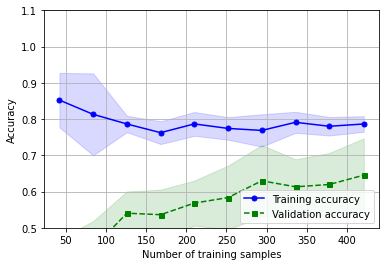

In [ ]:
# Plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf_best,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()

In [ ]:
# Evaluate model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Accuracy in training dataset
acc_train = np.mean(cross_val_score(clf_best, X_train, y_train, cv=10))
acc_train_std = np.std(cross_val_score(clf_best, X_train, y_train, cv=10))

# Predict the values from the test dataset
X_test, y_test_matrix = test_features.reshape(test_size,8*8*1024), test_labels
y_test = np.argmax(y_test_matrix, axis = 1)

y_pred = clf_best.predict(X_test)


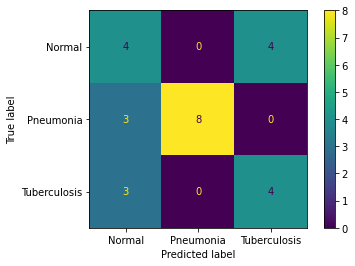

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculosis'])
disp.plot()
plt.show()

In [ ]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['Normal', 'Pneumonia', 'Tuberculosis']))


              precision    recall  f1-score   support

      Normal       0.40      0.50      0.44         8
   Pneumonia       1.00      0.73      0.84        11
Tuberculosis       0.50      0.57      0.53         7

    accuracy                           0.62        26
   macro avg       0.63      0.60      0.61        26
weighted avg       0.68      0.62      0.64        26



In [ ]:
# Compute the classification metrics on the test set
accuracy = accuracy_score(y_true = y_test,y_pred = y_pred)
precision = precision_score(y_true = y_test,y_pred = y_pred, average='macro')
recall = recall_score(y_true = y_test,y_pred = y_pred, average='macro')
f1 = f1_score(y_true = y_test,y_pred = y_pred, average='macro')
f1_vector = f1_score(y_true = y_test,y_pred = y_pred, average=None)


# Dictionnary with metrics

print('acc_train: ', acc_train)
print('acc_train_std: ', acc_train_std)
print('Accuracy', accuracy.round(4))
print('Precision', precision.round(4))
print('Recall', recall.round(4))
print('Global F1', f1.round(4))
print('F1 Normal', f1_vector[0])
print('F1 Pneumonia', f1_vector[1])
print('F1 Tuberculosis', f1_vector[2])

data =  {
'acc_train': [],
'acc_train_std': [],
'Accuracy' : [],
'Precision' : [],
'Recall' : [],
'Global F1' : [],
'F1 Normal' : [],
'F1 Pneumonia' : [],
'F1 Tuberculosis' : [],
}

df_results = pd.DataFrame(data)

new_row =  {
'acc_train': acc_train,
'acc_train_std': acc_train_std,
'Accuracy' : accuracy.round(4),
'Precision' : precision.round(4),
'Recall' : recall.round(4),
'Global F1' : f1.round(4),
'F1 Normal' : f1_vector[0],
'F1 Pneumonia' : f1_vector[1],
'F1 Tuberculosis' : f1_vector[2],
}

df_results = df_results.append(new_row, ignore_index=True)

df_results.to_excel('results_DenseNet_Adaboost_1201.xlsx')
!cp results_DenseNet_Adaboost_1201.xlsx "/content/drive/Shareddrives/Applied AI Project/Pedro/Results" #wherever u want

df_results

acc_train:  0.5724329324699353
acc_train_std:  0.04864853589723093
Accuracy 0.6154
Precision 0.6333
Recall 0.5996
Global F1 0.6066
F1 Normal 0.4444444444444445
F1 Pneumonia 0.8421052631578948
F1 Tuberculosis 0.5333333333333333


,acc_train,acc_train_std,Accuracy,Precision,Recall,Global F1,F1 Normal,F1 Pneumonia,F1 Tuberculosis
0,0.572433,0.048649,0.6154,0.6333,0.5996,0.6066,0.444444,0.842105,0.533333


# **6. Train best model in the whole dataset - VGG19 Feature Extractor + SVM Classifier**

In [ ]:
# Model metadata
input_shape = (256, 256, 3)

In [ ]:
# Dataset folders 
%cd /content/drive/Shareddrives/Applied AI Project/Alix
dataset_dir = 'Dataset_030123'
training_dir = os.path.join(dataset_dir, 'training')
validation_dir = os.path.join(dataset_dir, 'validation')
test_dir = os.path.join(dataset_dir, 'test')
augmentation_dir = os.path.join(dataset_dir, 'augmentation')

train_size = 5760  ###################### NEED TO BE CHANGED ACCORDING TO THE dataset_dir choosen
validation_size = 360 
test_size = 360 

/content/drive/Shareddrives/Applied AI Project/Alix


### CNN Feature Extractor

80134624/80134624 [==============================] - 4s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

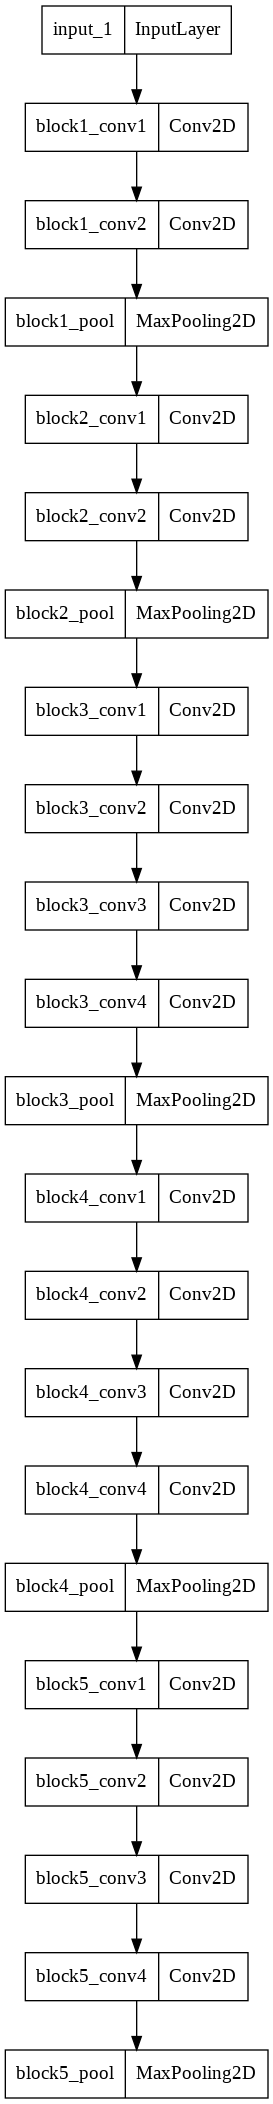

In [ ]:
# Download and plot the VGG19 model
conv_base = tfk.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape
)
conv_base.summary()
tfk.utils.plot_model(conv_base)

In [ ]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(preprocessing_function=tfk.applications.vgg19.preprocess_input)
batch_size = 8

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8,8,512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            #classes=labels, # can be set to labels
                                            class_mode='categorical',
                                            batch_size=8,
                                            shuffle=True,
                                            seed=seed)
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size, :] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(augmentation_dir, train_size)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(validation_dir, validation_size)
test_features, test_labels = extract_features(test_dir, test_size)

Found 5760 images belonging to 3 classes.
1/1 [==============================] - 0s 19ms/step
Found 360 images belonging to 3 classes.
1/1 [==============================] - 0s 19ms/step
Found 360 images belonging to 3 classes.
1/1 [==============================] - 0s 20ms/step


In [ ]:
%cd /content/drive/Shareddrives/Applied AI Project/Pedro


/content/drive/Shareddrives/Applied AI Project/Pedro


In [ ]:
# Concatenate training and validation sets
svm_features = np.concatenate((train_features, validation_features))
svm_labels = np.concatenate((train_labels, validation_labels))
train_val_size = train_size + validation_size

In [ ]:
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, y_train_matrix = svm_features.reshape(train_val_size,8*8*512), svm_labels

y_train = np.argmax(y_train_matrix, axis = 1)


### Train and evaluate best model

In [ ]:
"""from sklearn import svm

#best_params_ = OrderedDict([('C', 0.16693582686049602), ('degree', 1), ('gamma', 0.00036432183323837773), ('kernel', 'poly')])

best_params_ = dict()
best_params_['C'] = 0.16693582686049602
best_params_['gamma'] = 0.00036432183323837773
best_params_['degree'] = 1
best_params_['kernel'] = 'poly'

#clf_best = svm.SVC(**clf.best_params_)

clf_best = svm.SVC(**best_params_)
clf_best.fit(X_train, y_train)"""

"from sklearn import svm\n\n#best_params_ = OrderedDict([('C', 0.16693582686049602), ('degree', 1), ('gamma', 0.00036432183323837773), ('kernel', 'poly')])\n\nbest_params_ = dict()\nbest_params_['C'] = 0.16693582686049602\nbest_params_['gamma'] = 0.00036432183323837773\nbest_params_['degree'] = 1\nbest_params_['kernel'] = 'poly'\n\n#clf_best = svm.SVC(**clf.best_params_)\n\nclf_best = svm.SVC(**best_params_)\nclf_best.fit(X_train, y_train)"

In [ ]:
# Save model
import joblib

#save your model or results
#joblib.dump(clf_best, 'model_VGG19+SVM_Final.pkl')

clf_best = joblib.load('model_VGG19+SVM_Final.pkl')

In [ ]:

"""
# Plot learning curves
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator = clf_best,
                                                        X = X_train,
                                                        y = y_train,
                                                        train_sizes = np.linspace(0.1,1.0,10),
                                                        cv = 10)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', 
         marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')


plt.plot(train_sizes, test_mean, color='green', linestyle='--',
         marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.1])
plt.show()"""

"\n# Plot learning curves\nfrom sklearn.model_selection import learning_curve\n\ntrain_sizes, train_scores, test_scores = learning_curve(estimator = clf_best,\n                                                        X = X_train,\n                                                        y = y_train,\n                                                        train_sizes = np.linspace(0.1,1.0,10),\n                                                        cv = 10)\ntrain_mean = np.mean(train_scores, axis=1)\ntrain_std = np.std(train_scores, axis=1)\ntest_mean = np.mean(test_scores, axis=1)\ntest_std = np.std(test_scores, axis=1)\n\nplt.plot(train_sizes, train_mean, color='blue', \n         marker='o', markersize=5, label='Training accuracy')\nplt.fill_between(train_sizes,\n                 train_mean + train_std,\n                 train_mean - train_std,\n                 alpha=0.15, color='blue')\n\n\nplt.plot(train_sizes, test_mean, color='green', linestyle='--',\n         marker='s', marker

In [ ]:
# Evaluate model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

#Accuracy in training dataset
#acc_train = np.mean(cross_val_score(clf_best, X_train, y_train, cv=10))
#acc_train_std = np.std(cross_val_score(clf_best, X_train, y_train, cv=10))

y_pred_train = clf_best.predict(X_train)
acc_train = accuracy_score(y_true = y_train,y_pred = y_pred_train)

In [ ]:
# Predict the values from the test dataset
X_test, y_test_matrix = test_features.reshape(test_size,8*8*512), test_labels
y_test = np.argmax(y_test_matrix, axis = 1)

y_pred = clf_best.predict(X_test)

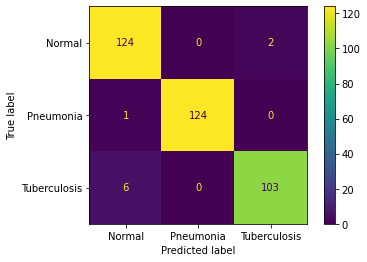

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=clf_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Pneumonia', 'Tuberculosis'])
disp.plot()
plt.show()

In [ ]:
# Classification report
print(classification_report(y_test, y_pred, target_names=['Normal', 'Pneumonia', 'Tuberculosis']))


              precision    recall  f1-score   support

      Normal       0.95      0.98      0.96       126
   Pneumonia       1.00      0.99      1.00       125
Tuberculosis       0.98      0.94      0.96       109

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.98       360



In [ ]:
# Compute the classification metrics on the test set
accuracy = accuracy_score(y_true = y_test,y_pred = y_pred)
precision = precision_score(y_true = y_test,y_pred = y_pred, average='macro')
recall = recall_score(y_true = y_test,y_pred = y_pred, average='macro')
f1 = f1_score(y_true = y_test,y_pred = y_pred, average='macro')
f1_vector = f1_score(y_true = y_test,y_pred = y_pred, average=None)


# Dictionnary with metrics

print('acc_train: ', acc_train)
print('Accuracy', accuracy.round(4))
print('Precision', precision.round(4))
print('Recall', recall.round(4))
print('Global F1', f1.round(4))
print('F1 Normal', f1_vector[0])
print('F1 Pneumonia', f1_vector[1])
print('F1 Tuberculosis', f1_vector[2])

data =  {
'acc_train': [],
'Accuracy' : [],
'Precision' : [],
'Recall' : [],
'Global F1' : [],
'F1 Normal' : [],
'F1 Pneumonia' : [],
'F1 Tuberculosis' : [],
}

df_results = pd.DataFrame(data)

new_row =  {
'acc_train': acc_train,
'Accuracy' : accuracy.round(4),
'Precision' : precision.round(4),
'Recall' : recall.round(4),
'Global F1' : f1.round(4),
'F1 Normal' : f1_vector[0],
'F1 Pneumonia' : f1_vector[1],
'F1 Tuberculosis' : f1_vector[2],
}

df_results = df_results.append(new_row, ignore_index=True)

df_results.to_excel('results_VGG19_SVM_Final.xlsx')
!cp results_VGG19_SVM_Final.xlsx "/content/drive/Shareddrives/Applied AI Project/Pedro/Results" #wherever u want

df_results

acc_train:  0.9488562091503268
Accuracy 0.975
Precision 0.9758
Recall 0.9737
Global F1 0.9745
F1 Normal 0.9649805447470817
F1 Pneumonia 0.9959839357429718
F1 Tuberculosis 0.9626168224299064


,acc_train,Accuracy,Precision,Recall,Global F1,F1 Normal,F1 Pneumonia,F1 Tuberculosis
0,0.948856,0.975,0.9758,0.9737,0.9745,0.964981,0.995984,0.962617


# **7. Apply model to new test set**

In [ ]:
# Dataset folders
%cd /content/drive/Shareddrives/Applied AI Project/Alix 
dataset_dir = 'Dataset_130123'
test_dir = os.path.join(dataset_dir, 'test')
test_size = 360 

/content/drive/Shareddrives/Applied AI Project/Alix


In [ ]:
# Extract features
import os, shutil
from keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(preprocessing_function=tfk.applications.vgg19.preprocess_input)
batch_size = 8

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 8,8,512))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,3))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(256,256),
                                            color_mode='rgb',
                                            #classes=labels, # can be set to labels
                                            class_mode='categorical',
                                            batch_size=8,
                                            shuffle=False,
                                            seed=seed)
    # Pass data through convolutional base
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size, :] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
test_features, test_labels = extract_features(test_dir, test_size)

Found 360 images belonging to 3 classes.
1/1 [==============================] - 0s 22ms/step


In [ ]:
import joblib
%cd /content/drive/Shareddrives/Applied AI Project/FINAL FOLDER/03- CNN feature extractor + Machine Learning Classifier

# Evaluate on test
model = joblib.load('model_VGG19+SVM_Final.pkl')


/content/drive/Shareddrives/Applied AI Project/FINAL FOLDER/03- CNN feature extractor + Machine Learning Classifier


In [ ]:
# Predict the values from the test dataset
X_test, y_test_matrix = test_features.reshape(test_size,8*8*512), test_labels
y_test = np.argmax(y_test_matrix, axis = 1)

y_pred = model.predict(X_test)

In [ ]:
print(y_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1

In [ ]:
# Classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Normal', 'Pneumonia', 'Tuberculosis']))


              precision    recall  f1-score   support

      Normal       0.99      0.98      0.98       129
   Pneumonia       1.00      1.00      1.00       123
Tuberculosis       0.97      0.99      0.98       108

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#**8. Format output**

Create a function that receives the model and the test dataset as input and provides a csv in the desired format as output.

Desired format:

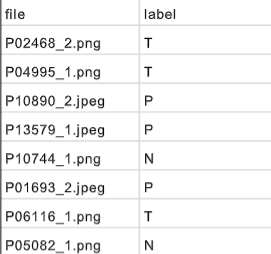

In [ ]:
%cd /content/drive/Shareddrives/Applied AI Project/Alix 
dataset_dir = 'Dataset_130123'
import os
list_names = []
rootdir = test_dir
folders = os.listdir(rootdir)
folders.sort()
for file in os.listdir(rootdir):
    print(file)
    folder_path = os.path.join(rootdir, file)
    if os.path.isdir(folder_path):
      if file == "Normal": list_n = os.listdir(folder_path)
      if file == "Pneumonia": list_p = os.listdir(folder_path)
      if file == "Tuberculosis": list_t = os.listdir(folder_path)
list_n.sort()
list_p.sort()
list_t.sort()
list_names = list_n + list_p
list_names += list_t
list_names # this is the lsit of names of images in the same order that they will be predicted in Y_pred

/content/drive/Shareddrives/Applied AI Project/Alix
Normal
Tuberculosis
Pneumonia


['P00126_2.png',
 'P00231_2.png',
 'P00239_1.png',
 'P00374_1.png',
 'P00389_1.png',
 'P00404_2.jpeg',
 'P00608_1.png',
 'P00651_1.png',
 'P00787_1.png',
 'P00852_1.png',
 'P00929_2.png',
 'P00988_2.png',
 'P01175_2.jpeg',
 'P01632_1.png',
 'P01649_1.png',
 'P01732_2.png',
 'P02034_1.png',
 'P02062_1.png',
 'P02163_1.png',
 'P02430_1.png',
 'P02469_2.jpeg',
 'P02622_1.png',
 'P02781_1.png',
 'P02997_1.png',
 'P03200_2.png',
 'P03208_2.jpeg',
 'P03281_1.png',
 'P03384_1.png',
 'P03621_2.jpeg',
 'P03624_1.png',
 'P03628_1.png',
 'P03709_1.png',
 'P03771_1.png',
 'P03990_1.jpeg',
 'P04095_2.png',
 'P04167_1.png',
 'P04182_1.png',
 'P04186_1.png',
 'P04630_1.png',
 'P04735_1.png',
 'P04782_1.jpeg',
 'P04988_1.png',
 'P05108_1.png',
 'P05138_1.jpeg',
 'P05270_2.png',
 'P05446_1.png',
 'P05527_1.png',
 'P05537_1.png',
 'P05571_2.jpeg',
 'P05676_2.png',
 'P05689_1.png',
 'P05720_2.png',
 'P06246_1.png',
 'P06366_2.png',
 'P06408_1.png',
 'P06497_1.jpeg',
 'P06579_1.png',
 'P06624_2.png',
 'P0

In [ ]:
Y_pred = model.predict(X_test)


In [ ]:
df_prediction = pd.DataFrame(columns=['file','label','true'])
save_path = "%cd /content/drive/Shareddrives/Applied AI Project/FINAL FOLDER/03- CNN feature extractor + Machine Learning Classifier"

In [ ]:

samples_per_batch = 8 # SAME THAT WE USED IN TEST_GEN DEFINITION
number_of_batchs = int(len(Y_pred)/samples_per_batch)
i = 0
for batch_number in range(number_of_batchs):
  for batch_size in range(samples_per_batch):
    real_class = test_gen[batch_number][1][batch_size]   
    pred_class = Y_pred[samples_per_batch*batch_number + batch_size] #produces an 1D array with '0' (N), '1' (P) or '2' (T)
    file_name = list_names[i]
    if pred_class == 0: # Normal
      label = "N"
    elif pred_class == 1: # Pneumonia
      label = "P"
    elif pred_class == 2: # Tuberculosis
      label = "T"
    if max(real_class) == real_class[0]: # Normal
      true = "N"
    elif max(real_class) == real_class[1]: # Pneumonia
      true = "P"
    elif max(real_class) == real_class[2]: # Tuberculosis
      true = "T"
    new_row = {'file':file_name, 'label':label, 'true': true}
    #append row to the dataframe
    df_prediction = df_prediction.append(new_row, ignore_index=True)
    i+=1

df_prediction

,file,label,true
0,P00126_2.png,N,N
1,P00231_2.png,N,N
2,P00239_1.png,N,N
3,P00374_1.png,N,N
4,P00389_1.png,N,N
...,...,...,...
355,P13503_1.png,T,T
356,P13591_1.png,T,T
357,P13645_1.png,T,T
358,P13777_1.png,T,T


In [ ]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

data.airports()
df_prediction

,file,label,true
0,P00126_2.png,N,N
1,P00231_2.png,N,N
2,P00239_1.png,N,N
3,P00374_1.png,N,N
4,P00389_1.png,N,N
...,...,...,...
355,P13503_1.png,T,T
356,P13591_1.png,T,T
357,P13645_1.png,T,T
358,P13777_1.png,T,T


In [ ]:
%cd /content/drive/Shareddrives/Applied AI Project/FINAL FOLDER/03- CNN feature extractor + Machine Learning Classifier

df_prediction.to_csv('predictions.csv', index=False)


/content/drive/Shareddrives/Applied AI Project/FINAL FOLDER/03- CNN feature extractor + Machine Learning Classifier
